# Read the file 

In [124]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import numba 
matplotlib.style.use('ggplot')
%matplotlib inline

## Clean 2013 Data 

In [125]:
%time df_all= pd.read_csv('2013_01_dublin_distance.csv',dtype={ 'Journey_Pattern_ID': object})
df=df_all

<string>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 39.2 s, sys: 20.8 s, total: 59.9 s
Wall time: 1min 8s


In [126]:
df.head(1)

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Stop_ID,At_Stop,First_Stop,Last_Stop,...,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
0,1357041305,00010001,2013-01-01,15581,-6.26205,53.391132,226,1,226,380,...,0,2013-01-01 11:55:05,11,Tuesday,0,am,3.0,0.0,2.59,16.75


# Remove the data error 

In [127]:
# Only keep the first row for every trip at the same Stop(keep both at or not_at stop)
%time df = df.drop_duplicates(['Vehicle_Journey_ID','Journey_Pattern_ID','Date','Lon_WGS84','Lat_WGS84'],keep='last')

CPU times: user 5.11 s, sys: 4.94 s, total: 10.1 s
Wall time: 13.2 s


In [128]:
zscore=lambda x: x - x.min()
%time df['Trip_Time']=df.groupby(['Vehicle_Journey_ID','Journey_Pattern_ID','Date'])['Timestamp'].transform(zscore)

CPU times: user 44.8 s, sys: 8.47 s, total: 53.2 s
Wall time: 1min 4s


/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
df.dtypes

Timestamp               int64
Journey_Pattern_ID     object
Date                   object
Vehicle_Journey_ID      int64
Lon_WGS84             float64
Lat_WGS84             float64
Stop_ID                object
At_Stop                 int64
First_Stop              int64
Last_Stop               int64
Distance                int64
Trip_Time               int64
datetime               object
HourOfDay               int64
day_of_week            object
midweek                 int64
time_bin               object
cloud                 float64
rain                  float64
temp                  float64
wind                  float64
dtype: object

In [130]:
df.drop(['Timestamp','Date','Vehicle_Journey_ID','Lon_WGS84','Lat_WGS84'],axis=1,inplace=True)
df.drop(['Stop_ID','First_Stop','Last_Stop','At_Stop'],axis=1,inplace=True)

/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [131]:
#Drop Journery Pattern Error 
df.drop(df.index[df['Journey_Pattern_ID']=='86-2'],inplace=True)
df.drop(df.index[df['Journey_Pattern_ID']=='OL77X101'],inplace=True)

/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
pd.unique(df.Journey_Pattern_ID).size

457

In [133]:
df.head(2)

,Journey_Pattern_ID,Distance,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
0,00010001,0,0,2013-01-01 11:55:05,11,Tuesday,0,am,3.0,0.0,2.59,16.75
1,00010001,35,319,2013-01-01 12:00:24,12,Tuesday,0,am,3.0,0.0,2.59,16.75


In [134]:
df2013=df

In [135]:
#%time df.to_csv('2013_model.csv',index=False)

In [136]:
#jour_diff=list(set(jour2) - set(jour3))


# Plot 2013 Data to check data quality 

In [137]:
# Prepare the descriptive features
X = pd.concat([df[['Distance','HourOfDay','midweek','cloud','rain','wind','temp']]], axis=1)
y = df.Trip_Time

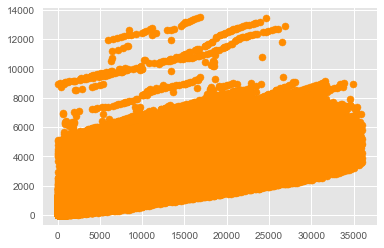

In [138]:
plt.scatter(X['Distance'], y, color='darkorange', label='data')
plt.show()

In [139]:
df_wrong=df.loc[(df['Distance']==0) & (df['Trip_Time']>0)]
df_wrong.shape

(42, 12)

In [140]:
df_wrong

,Journey_Pattern_ID,Distance,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
40971,00010002,0,118,2013-01-11 07:15:24,7,Friday,0,am,3.25,0.00,2.41,4.88
45937,00011001,0,361,2013-01-02 12:01:04,12,Wednesday,0,am,7.88,0.00,9.46,16.75
57501,00011001,0,318,2013-01-08 10:00:16,10,Tuesday,0,am,7.00,0.05,10.38,11.25
83005,00011001,0,359,2013-01-22 11:00:32,11,Tuesday,0,am,3.50,0.00,-3.20,3.00
95875,00011001,0,180,2013-01-29 09:29:08,9,Tuesday,0,am,7.38,0.03,8.32,10.88
99337,00011002,0,221,2013-01-08 08:10:22,8,Tuesday,0,am,7.00,0.05,10.38,11.25
634058,00091001,0,318,2013-01-14 14:45:10,14,Monday,0,pm,2.25,0.01,3.22,13.38
682122,00091001,0,199,2013-01-26 14:13:27,14,Saturday,1,pm,8.00,0.19,9.44,14.50
682937,00091001,0,343,2013-01-26 10:50:45,10,Saturday,1,am,3.12,0.00,4.14,9.88
1148408,00141001,0,62,2013-01-03 15:40:07,15,Thursday,0,pm,7.00,0.00,11.51,12.50


## Clean 2012 Data 

In [142]:
%time df= pd.read_csv('dublin_2012_11_distance.csv',dtype={ 'Journey_Pattern_ID': object})

<string>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 32.9 s, sys: 19.6 s, total: 52.4 s
Wall time: 59.3 s


In [143]:
# Only keep the first row for every trip at the same Stop(keep both at or not_at stop)
%time df = df.drop_duplicates(['Vehicle_Journey_ID','Journey_Pattern_ID','Date','Lon_WGS84','Lat_WGS84'],keep='last')
zscore=lambda x: x - x.min()
%time df['Trip_Time']=df.groupby(['Vehicle_Journey_ID','Journey_Pattern_ID','Date'])['Timestamp'].transform(zscore)

CPU times: user 4.59 s, sys: 4.26 s, total: 8.85 s
Wall time: 11.3 s
CPU times: user 37.6 s, sys: 2.09 s, total: 39.7 s
Wall time: 40.8 s


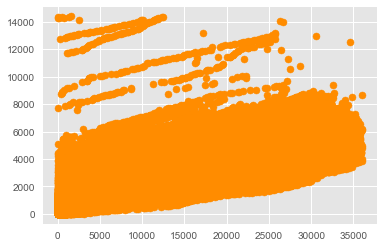

In [144]:
# Prepare the descriptive features
X = pd.concat([df[['Distance','HourOfDay','midweek','cloud','rain','wind','temp']]], axis=1)
y = df.Trip_Time
plt.scatter(X['Distance'], y, color='darkorange', label='data')
plt.show()

In [145]:
df.head()

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Stop_ID,At_Stop,First_Stop,Last_Stop,...,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
0,1352204113,00010001,2012-11-06,5427,-6.262000,53.391182,226,1,226,380,...,0,2012-11-06 12:15:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
1,1352204473,00010001,2012-11-06,5427,-6.262341,53.391186,226,0,226,380,...,360,2012-11-06 12:21:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
2,1352204510,00010001,2012-11-06,5427,-6.259799,53.391804,228,1,226,380,...,397,2012-11-06 12:21:50,12,Tuesday,0,am,6.88,0.0,7.55,16.25
3,1352204531,00010001,2012-11-06,5427,-6.259056,53.391758,228,0,226,380,...,418,2012-11-06 12:22:11,12,Tuesday,0,am,6.88,0.0,7.55,16.25
4,1352204553,00010001,2012-11-06,5427,-6.256530,53.391335,229,1,226,380,...,440,2012-11-06 12:22:33,12,Tuesday,0,am,6.88,0.0,7.55,16.25


In [146]:
df.drop(['Timestamp','Date','Vehicle_Journey_ID','Lon_WGS84','Lat_WGS84'],axis=1,inplace=True)
df.drop(['Stop_ID','First_Stop','Last_Stop','At_Stop'],axis=1,inplace=True)

In [147]:
pd.unique(df.Journey_Pattern_ID).size

480

In [148]:
#Drop Journery Pattern Error 
df.drop(df.index[df['Journey_Pattern_ID']=='OL840013'],inplace=True)
df.drop(df.index[df['Journey_Pattern_ID']=='OL77X101'],inplace=True)
df.drop(df.index[df['Journey_Pattern_ID']=='PP071001'],inplace=True)

In [149]:
df2012=df

In [150]:
df2012.head()

,Journey_Pattern_ID,Distance,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
0,00010001,0,0,2012-11-06 12:15:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
1,00010001,22,360,2012-11-06 12:21:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
2,00010001,215,397,2012-11-06 12:21:50,12,Tuesday,0,am,6.88,0.0,7.55,16.25
3,00010001,264,418,2012-11-06 12:22:11,12,Tuesday,0,am,6.88,0.0,7.55,16.25
4,00010001,439,440,2012-11-06 12:22:33,12,Tuesday,0,am,6.88,0.0,7.55,16.25


In [151]:
#df.to_csv('2012_model.csv',index=False)

# Concat two data frame 

In [152]:
#pd.unique(df2012.Journey_Pattern_ID).size

In [153]:
#pd.unique(df2013.Journey_Pattern_ID).size

In [154]:
df=pd.concat([df2012,df2013])
pd.unique(df.Journey_Pattern_ID).size

478

In [155]:
df.head()

,Journey_Pattern_ID,Distance,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
0,00010001,0,0,2012-11-06 12:15:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
1,00010001,22,360,2012-11-06 12:21:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
2,00010001,215,397,2012-11-06 12:21:50,12,Tuesday,0,am,6.88,0.0,7.55,16.25
3,00010001,264,418,2012-11-06 12:22:11,12,Tuesday,0,am,6.88,0.0,7.55,16.25
4,00010001,439,440,2012-11-06 12:22:33,12,Tuesday,0,am,6.88,0.0,7.55,16.25


In [156]:
df.shape

(16852100, 12)

# Check Data quality for all data 

In [157]:
df_wrong=df.loc[(df['Distance']==0) & (df['Trip_Time']>0)]
df_wrong.shape

(76, 12)

In [161]:
df_wrong

,Journey_Pattern_ID,Distance,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
36115,00011001,0,302,2012-11-06 13:00:07,13,Tuesday,0,pm,6.38,0.00,9.19,17.62
44639,00011001,0,341,2012-11-10 19:30:54,19,Saturday,1,pm,2.75,0.00,5.70,10.75
51427,00011001,0,197,2012-11-15 09:20:12,9,Thursday,0,am,6.38,0.00,9.71,3.75
81943,00011002,0,320,2012-11-29 07:00:26,7,Thursday,0,am,5.50,0.00,0.66,7.50
161041,00041001,0,19,2012-11-13 08:47:04,8,Tuesday,0,am,7.38,0.00,12.70,18.50
535942,00091001,0,221,2012-11-07 15:43:27,15,Wednesday,0,pm,7.00,0.00,10.19,17.12
600867,00091001,0,320,2012-11-27 11:00:33,11,Tuesday,0,am,4.88,0.00,4.17,14.25
971844,00141001,0,140,2012-11-12 21:10:08,21,Monday,0,late_pm,7.00,0.00,12.47,9.33
981356,00141001,0,260,2012-11-14 07:49:17,7,Wednesday,0,am,6.62,0.00,11.65,10.25
981877,00141001,0,181,2012-11-14 08:20:11,8,Wednesday,0,am,6.62,0.00,11.65,10.25


In [163]:
df.shape

(16852100, 12)

In [164]:
df.to_csv('final_table_model.csv',index=False)